# GRiD Dataset

In [2]:
import pandas as pd
import numpy as np


In [3]:
df =pd.read_csv(r'C:\Users\Admin\HC3 EDA\reddit_filtered_dataset.csv')

In [4]:
df

Data  Labels
0     Of course! The relevant passage is: "As to you...       0
1     I've actually written a bit about this before....       0
2     The Waco standoff in 1993 was a complex and co...       1
3     Incredible answer. This was very well sourced ...       0
4     The identification of the ruins of Troy is bas...       1
...                                                 ...     ...
6508  When medical professionals say that someone is...       1
6509  Pretty much. A small quick dip is all that the...       0
6510  Plastics contain lots of very tiny holes. When...       0
6511  When people talk about "dirty money," they usu...       1
6512  ELI5: The restaurant industry did not convince...       1

[6513 rows x 2 columns]

In [8]:
gpt_df = df[(df['Labels']==1)]
gpt_df

Data  Labels
2     The Waco standoff in 1993 was a complex and co...       1
4     The identification of the ruins of Troy is bas...       1
9     "Sk8er Boi" by Avril Lavigne, released in 2002...       1
11    The activities you are referring to were carri...       1
17    The release of the JFK assassination files in ...       1
...                                                 ...     ...
6502  When it's very bright outside, like on a sunny...       1
6505  Imagine you have a long string with knots tied...       1
6508  When medical professionals say that someone is...       1
6511  When people talk about "dirty money," they usu...       1
6512  ELI5: The restaurant industry did not convince...       1

[1368 rows x 2 columns]

In [9]:
import nltk
from nltk import *

def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

clean_gpt = []
try:
  for sentence in gpt_df['Data']:

    # process sentences
    cleane = preprocess(sentence)
    clean_gpt.append(cleane)

except KeyError:
  print("Column 'Data' not found")

In [10]:
Q_reddit_gpt =[]
for pair in clean_gpt:

    for word, tag in pair:
        if tag != "NNP" and tag != ":" and tag != "''" and tag != "``" and tag != ".":
            Q_reddit_gpt.append(word)

        elif tag == "NNP": 
            q = "Q"
            Q_reddit_gpt.append(q)

        elif tag == ":":
            q = "Q" 
            Q_reddit_gpt.append(q)

        elif tag == ".":
            q = "Q"
            Q_reddit_gpt.append(q)
            
clean_words3 =[]
for word in Q_reddit_gpt:
    if word != "Q":

        lowe= word.lower()
        clean_words3.append(lowe)
    elif word == "Q":
        q ="Q"
        clean_words3.append(q)

In [15]:
tem_df = pd.DataFrame({'Word':clean_words3})
tem_df.to_csv('Q Reddit GPT Words.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    6513 non-null   object
 1   Labels  6513 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.9+ KB


>> observation: humans write short , fragemented and descriptive sentences ex. 'Incredible answer.' or 'Pretty much.' , while chatgpt's sentences are longer , more dramatic and complete.

In [6]:
# isolate the chatgpt phrases Labels = 1 
# selecting rows based on condition 
# selecting rows based on condition 
# selecting rows based on condition 
rslt_df = df[(df['Labels'] == 1) ] 

In [7]:
rslt_df

Data  Labels
2     The Waco standoff in 1993 was a complex and co...       1
4     The identification of the ruins of Troy is bas...       1
9     "Sk8er Boi" by Avril Lavigne, released in 2002...       1
11    The activities you are referring to were carri...       1
17    The release of the JFK assassination files in ...       1
...                                                 ...     ...
6502  When it's very bright outside, like on a sunny...       1
6505  Imagine you have a long string with knots tied...       1
6508  When medical professionals say that someone is...       1
6511  When people talk about "dirty money," they usu...       1
6512  ELI5: The restaurant industry did not convince...       1

[1368 rows x 2 columns]

In [8]:
rslt_df = rslt_df['Data'].astype('string')

In [9]:
rslt_df.info() # 80.4 kb vs 101.9+ KB for object type

<class 'pandas.core.series.Series'>
Index: 1368 entries, 2 to 6512
Series name: Data
Non-Null Count  Dtype 
--------------  ----- 
1368 non-null   string
dtypes: string(1)
memory usage: 21.4 KB


# PREPROCESS

In [10]:
## remove context words , proper nouns , punctuation , numbers , make all lower-case, some/all stopwwords

import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [11]:
# count ohw many characters
total_words = 0
for row in rslt_df:
  total_words += len(" ".join(row).split())


In [12]:
total_words


517022

In [13]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

>>> working on rslt_df  = only gpt responses

In [14]:
clean1 = []


try:
  for sentence in rslt_df:

    # process sentences
    cleane = preprocess(sentence)
    clean1.append(cleane)

except KeyError:
  print("Column 'Data' not found")

   


In [15]:
clean1

[[('The', 'DT'),
  ('Waco', 'NNP'),
  ('standoff', 'NN'),
  ('in', 'IN'),
  ('1993', 'CD'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('complex', 'JJ'),
  ('and', 'CC'),
  ('controversial', 'JJ'),
  ('event', 'NN'),
  ('that', 'WDT'),
  ('garnered', 'VBD'),
  ('significant', 'JJ'),
  ('attention', 'NN'),
  ('and', 'CC'),
  ('sparked', 'VBD'),
  ('various', 'JJ'),
  ('reactions', 'NNS'),
  ('among', 'IN'),
  ('the', 'DT'),
  ('American', 'JJ'),
  ('population', 'NN'),
  ('.', '.'),
  ('It', 'PRP'),
  ('is', 'VBZ'),
  ('important', 'JJ'),
  ('to', 'TO'),
  ('note', 'VB'),
  ('that', 'IN'),
  ('not', 'RB'),
  ('all', 'DT'),
  ('segments', 'NNS'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('population', 'NN'),
  ('rallied', 'VBD'),
  ('around', 'IN'),
  ('the', 'DT'),
  ('leader', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('Branch', 'NNP'),
  ('Davidians', 'NNP'),
  (',', ','),
  ('David', 'NNP'),
  ('Koresh', 'NNP'),
  (',', ','),
  ('and', 'CC'),
  ('his', 'PRP$'),
  ('actions', 'NNS'),
  ('.', '.'),


In [16]:
rslt_df

2       The Waco standoff in 1993 was a complex and co...
4       The identification of the ruins of Troy is bas...
9       "Sk8er Boi" by Avril Lavigne, released in 2002...
11      The activities you are referring to were carri...
17      The release of the JFK assassination files in ...
                              ...                        
6502    When it's very bright outside, like on a sunny...
6505    Imagine you have a long string with knots tied...
6508    When medical professionals say that someone is...
6511    When people talk about "dirty money," they usu...
6512    ELI5: The restaurant industry did not convince...
Name: Data, Length: 1368, dtype: string

In [17]:
rslt_df.to_csv('reddit_gpt_unclean.csv')

In [18]:
clean1

[[('The', 'DT'),
  ('Waco', 'NNP'),
  ('standoff', 'NN'),
  ('in', 'IN'),
  ('1993', 'CD'),
  ('was', 'VBD'),
  ('a', 'DT'),
  ('complex', 'JJ'),
  ('and', 'CC'),
  ('controversial', 'JJ'),
  ('event', 'NN'),
  ('that', 'WDT'),
  ('garnered', 'VBD'),
  ('significant', 'JJ'),
  ('attention', 'NN'),
  ('and', 'CC'),
  ('sparked', 'VBD'),
  ('various', 'JJ'),
  ('reactions', 'NNS'),
  ('among', 'IN'),
  ('the', 'DT'),
  ('American', 'JJ'),
  ('population', 'NN'),
  ('.', '.'),
  ('It', 'PRP'),
  ('is', 'VBZ'),
  ('important', 'JJ'),
  ('to', 'TO'),
  ('note', 'VB'),
  ('that', 'IN'),
  ('not', 'RB'),
  ('all', 'DT'),
  ('segments', 'NNS'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('population', 'NN'),
  ('rallied', 'VBD'),
  ('around', 'IN'),
  ('the', 'DT'),
  ('leader', 'NN'),
  ('of', 'IN'),
  ('the', 'DT'),
  ('Branch', 'NNP'),
  ('Davidians', 'NNP'),
  (',', ','),
  ('David', 'NNP'),
  ('Koresh', 'NNP'),
  (',', ','),
  ('and', 'CC'),
  ('his', 'PRP$'),
  ('actions', 'NNS'),
  ('.', '.'),


In [19]:
no_proper_nouns_reddit = []
for sent in clean1:

    for word , tag  in  sent:

        if tag != 'NNP' and   tag != '.' and  tag != ':' and  tag != 'DT' and tag != '``':  
            
            no_proper_nouns_reddit.append((word,tag))


In [20]:
no_proper_nouns_reddit

[('standoff', 'NN'),
 ('in', 'IN'),
 ('1993', 'CD'),
 ('was', 'VBD'),
 ('complex', 'JJ'),
 ('and', 'CC'),
 ('controversial', 'JJ'),
 ('event', 'NN'),
 ('that', 'WDT'),
 ('garnered', 'VBD'),
 ('significant', 'JJ'),
 ('attention', 'NN'),
 ('and', 'CC'),
 ('sparked', 'VBD'),
 ('various', 'JJ'),
 ('reactions', 'NNS'),
 ('among', 'IN'),
 ('American', 'JJ'),
 ('population', 'NN'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('important', 'JJ'),
 ('to', 'TO'),
 ('note', 'VB'),
 ('that', 'IN'),
 ('not', 'RB'),
 ('segments', 'NNS'),
 ('of', 'IN'),
 ('population', 'NN'),
 ('rallied', 'VBD'),
 ('around', 'IN'),
 ('leader', 'NN'),
 ('of', 'IN'),
 (',', ','),
 (',', ','),
 ('and', 'CC'),
 ('his', 'PRP$'),
 ('actions', 'NNS'),
 ('However', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ('were', 'VBD'),
 ('certain', 'JJ'),
 ('factors', 'NNS'),
 ('that', 'WDT'),
 ('contributed', 'VBD'),
 ('to', 'TO'),
 ('support', 'NN'),
 ('received', 'VBN'),
 ('by', 'IN'),
 ('group', 'NN'),
 ('during', 'IN'),
 ('time', 'NN'),
 ('1', 'C

In [21]:

# for word in word,tag in no_proper_nouns_reddit:
#     no_prop_nouns_red_df=  pd.DataFrame({'word':word})
    

d = []
for  word,tag in no_proper_nouns_reddit :

    d.append(
        {
            'word': word
            
        }
    )

no_proper_nouns_df = pd.DataFrame(d)


In [22]:
# same as above just with 'the'
no_proper_nouns_reddit_2 = []
for sent in clean1:

    for word , tag  in  sent:

        if tag != 'NNP' and   tag != '.' and  tag != ':' and  tag != '``' and tag != 'CD':  
            
            no_proper_nouns_reddit_2.append((word,tag))


In [23]:
no_proper_nouns_reddit_2

[('The', 'DT'),
 ('standoff', 'NN'),
 ('in', 'IN'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('complex', 'JJ'),
 ('and', 'CC'),
 ('controversial', 'JJ'),
 ('event', 'NN'),
 ('that', 'WDT'),
 ('garnered', 'VBD'),
 ('significant', 'JJ'),
 ('attention', 'NN'),
 ('and', 'CC'),
 ('sparked', 'VBD'),
 ('various', 'JJ'),
 ('reactions', 'NNS'),
 ('among', 'IN'),
 ('the', 'DT'),
 ('American', 'JJ'),
 ('population', 'NN'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('important', 'JJ'),
 ('to', 'TO'),
 ('note', 'VB'),
 ('that', 'IN'),
 ('not', 'RB'),
 ('all', 'DT'),
 ('segments', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('population', 'NN'),
 ('rallied', 'VBD'),
 ('around', 'IN'),
 ('the', 'DT'),
 ('leader', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 (',', ','),
 (',', ','),
 ('and', 'CC'),
 ('his', 'PRP$'),
 ('actions', 'NNS'),
 ('However', 'RB'),
 (',', ','),
 ('there', 'EX'),
 ('were', 'VBD'),
 ('certain', 'JJ'),
 ('factors', 'NNS'),
 ('that', 'WDT'),
 ('contributed', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('support'

In [24]:

d = []
for  word,tag in no_proper_nouns_reddit_2 :

    d.append(
        {
            'word': word
            
        }
    )


no_proper_nouns_df2 = pd.DataFrame(d)

In [25]:
no_proper_nouns_df2.to_csv('reddit_bigram_ready.csv', index=False)

In [26]:
# isolate NNs or NN to remove context based words
for word , tag in no_proper_nouns_reddit:
    # for word, tag in sent:
    if tag == "NN" or tag == "NNS":

        print((word,tag))

('standoff', 'NN')
('event', 'NN')
('attention', 'NN')
('reactions', 'NNS')
('population', 'NN')
('segments', 'NNS')
('population', 'NN')
('leader', 'NN')
('actions', 'NNS')
('factors', 'NNS')
('support', 'NN')
('group', 'NN')
('time', 'NN')
('Coverage', 'NN')
('media', 'NNS')
('role', 'NN')
('perception', 'NN')
('events', 'NNS')
('identification', 'NN')
('ruins', 'NNS')
('combination', 'NN')
('evidence', 'NN')
('accounts', 'NNS')
('sources', 'NNS')
('site', 'NN')
('archaeologist', 'NN')
('century', 'NN')
('excavation', 'NN')
('methods', 'NNS')
('work', 'NN')
('existence', 'NN')
('city', 'NN')
('pieces', 'NNS')
('evidence', 'NN')
('stratigraphy', 'NN')
('site', 'NN')
('aspects', 'NNS')
('school', 'NN')
('dynamics', 'NNS')
('time', 'NN')
('period', 'NN')
('city/suburban', 'NN')
('schools', 'NNS')
('experiences', 'NNS')
('schools', 'NNS')
('regions', 'NNS')
('song', 'NN')
('elements', 'NNS')
('pecking', 'NN')
('order', 'NN')
('turn', 'NN')
('century', 'NN')
('hierarchy', 'NN')
('schools'

In [27]:
# context specific nouns to remove 
domain_nouns = ['earnings', 'wage', 'standoff', 'event', 'attention', 'reactions', 'population', 'population', 'leader', 'Coverage', 'media', 'events', 'identification', 'ruins', 'combination', 'evidence','city', 'buildings', 'palace', 'temple', 'temple', 'palace', 'palace', 'temple', '-', 'canal', 'statues', 'art', 'manuscripts', 'temples', 'colonial', 'conquest', 'fervour', 'faith', 'destruction', 'temples', 'cities', 'jurisdiction', 'religions', 'building', 'cathedrals', 'tradition', 'reconquista', '"', 'conspiracy', 'theories', 'propaganda', 'memory.I', 'century', 'tradition', 'cathedrals', 'mosques', 'conquistadors', 'medieval', 'medieval', 'buildings', 'state', 'cabals', 'rhetoric', 'literature', 'century', 'countries', 'climate', 'freemasonry', 'power', 'palace', 'religion', 'temple']

In [28]:
reddit_clean_v3 =[]
for word , tag in no_proper_nouns_reddit:
    if word not in domain_nouns:
        # Remove non-alphanumeric characters and replace them with a space
        cleaned_sentence3 = re.sub(r'\W+', ' ', word)
        # Convert each word to lowercase if it's alphabetic
        cleaned_sentence3 = ' '.join(word.lower() for word in cleaned_sentence3.split() if word.isalpha())
        reddit_clean_v3.append(cleaned_sentence3)

In [29]:
reddit_clean_v3

['in',
 '',
 'was',
 'complex',
 'and',
 'controversial',
 'that',
 'garnered',
 'significant',
 'and',
 'sparked',
 'various',
 'among',
 'american',
 'it',
 'is',
 'important',
 'to',
 'note',
 'that',
 'not',
 'segments',
 'of',
 'rallied',
 'around',
 'of',
 '',
 '',
 'and',
 'his',
 'actions',
 'however',
 '',
 'there',
 'were',
 'certain',
 'factors',
 'that',
 'contributed',
 'to',
 'support',
 'received',
 'by',
 'group',
 'during',
 'time',
 '',
 'played',
 'significant',
 'role',
 'in',
 'shaping',
 'public',
 'perception',
 'of',
 'in',
 'of',
 'of',
 'is',
 'based',
 'on',
 'of',
 'archaeological',
 '',
 'historical',
 'accounts',
 '',
 'and',
 'literary',
 'sources',
 'site',
 'of',
 '',
 'located',
 'in',
 'modern day',
 '',
 'was',
 'initially',
 'discovered',
 'by',
 'german',
 'archaeologist',
 'in',
 'late',
 '',
 'while',
 's',
 'excavation',
 'methods',
 'were',
 'not',
 'always',
 'scientifically',
 'rigorous',
 '',
 'subsequent',
 'archaeological',
 'work',
 'has'

In [30]:
len(reddit_clean_v3)

90038

In [31]:
df_reddit = pd.DataFrame({'word' :[word for word in reddit_clean_v3]})
df_reddit

word
0           in
1             
2          was
3      complex
4          and
...        ...
90033       to
90034       at
90035    least
90036  regular
90037  minimum

[90038 rows x 1 columns]

In [32]:
df_reddit.to_csv('prepped reddit.csv')

# Frequency of each word  | or add 3 other datasets to this list and check freq of merged

### Attempt 1: add three datasets to this list

In [33]:
df_answers = pd.read_csv(r'C:\Users\Admin\HC3 EDA\prepped answers.csv')

In [34]:
df_answers.rename(columns={'words':'word'}, inplace="TRUE")

In [35]:
df_para = pd.read_csv(r'C:\Users\Admin\HC3 EDA\prepped para.csv')

In [36]:
df_para

Unnamed: 0      words
0              0        NaN
1              1        can
2              2        you
3              3    provide
4              4   detailed
...          ...        ...
3978        3978  perpetual
3979        3979       busy
3980        3980         on
3981        3981         at
3982        3982        NaN

[3983 rows x 2 columns]

In [37]:
df_para = df_para.drop(columns=['Unnamed: 0'])


In [38]:
df_para

words
0           NaN
1           can
2           you
3       provide
4      detailed
...         ...
3978  perpetual
3979       busy
3980         on
3981         at
3982        NaN

[3983 rows x 1 columns]

In [39]:
# filter for nans
df_para = df_para.dropna()


In [40]:
df_para.rename(columns={'words': 'word'}, inplace=True)
df_para

C:\Users\Admin\AppData\Local\Temp\ipykernel_28656\780470067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_para.rename(columns={'words': 'word'}, inplace=True)


word
1           can
2           you
3       provide
4      detailed
5           for
...         ...
3977        for
3978  perpetual
3979       busy
3980         on
3981         at

[3794 rows x 1 columns]

In [41]:
# essays
df_essays = pd.read_csv(r'C:\Users\Admin\HC3 EDA\prepped essays.csv')

In [42]:
df_essays

Unnamed: 0         word
0                0         when
1                1  considering
2                2          the
3                3          and
4                4           of
...            ...          ...
366419      366419      provide
366420      366420            a
366421      366421         safe
366422      366422          for
366423      366423          and

[366424 rows x 2 columns]

In [43]:
df_essays = df_essays.drop(columns=['Unnamed: 0'])


In [44]:
df_answers = df_answers.drop(columns=['Unnamed: 0'])


In [45]:
result = pd.concat([df_essays, df_answers,df_para, df_reddit], ignore_index=True)
print(result)

               word
0              when
1       considering
2               the
3               and
4                of
...             ...
474793           to
474794           at
474795        least
474796      regular
474797      minimum

[474798 rows x 1 columns]


In [46]:
words = set()
for word in result['word']:
  words.add(word)

uniq_words = len(words)


In [47]:
uniq_words

12863

# Fredquencis

In [48]:
freq = FreqDist()

for word in result['word']:
    freq[word] += 1

# top_words = freq.most_common(100)

In [49]:
top_words = freq.most_common(1000000)
top_words

[('to', 25301),
 ('and', 23803),
 ('the', 18867),
 ('of', 16087),
 ('a', 13185),
 ('in', 12180),
 ('can', 9330),
 ('is', 8383),
 ('it', 7350),
 ('', 7141),
 ('for', 7020),
 ('that', 7012),
 ('be', 6048),
 ('with', 4857),
 ('as', 4818),
 ('their', 4797),
 ('on', 4639),
 ('are', 4243),
 ('have', 3829),
 ('or', 3417),
 ('an', 3066),
 ('more', 2984),
 ('from', 2938),
 ('our', 2834),
 ('i', 2822),
 (nan, 2568),
 ('not', 2532),
 ('s', 2459),
 ('they', 2391),
 ('when', 2343),
 ('this', 2338),
 ('also', 2292),
 ('by', 2269),
 ('we', 2264),
 ('you', 1956),
 ('one', 1936),
 ('may', 1934),
 ('important', 1897),
 ('has', 1788),
 ('them', 1670),
 ('make', 1584),
 ('us', 1516),
 ('help', 1504),
 ('other', 1501),
 ('such', 1483),
 ('positive', 1452),
 ('there', 1437),
 ('my', 1425),
 ('was', 1404),
 ('who', 1337),
 ('own', 1258),
 ('which', 1249),
 ('while', 1219),
 ('take', 1207),
 ('your', 1201),
 ('at', 1184),
 ('could', 1163),
 ('but', 1155),
 ('having', 1138),
 ('many', 1085),
 ('provide', 1009)

In [50]:
len(top_words)

12863

12,863 unique words after preliminary prep ( ex. removing proper nouns and some stop words) but with many stop words such as 'a' and 'it'

# PREP Further remove stopwords

In [51]:
# filtered_words =[]
# for word , count in top_words:
#     if word not  in stopwords:
#         filtered_words.append((word,count))


        



In [52]:
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words('english')

additional_stopwords = ['n t', ''] 

all_stopwords = nltk_stopwords + additional_stopwords


In [53]:


to_keep = ['whom','which','been', 'being', 'have','having', 'do', 'does', 'did', 'doing','but', 'if','because','until', 'while','about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below','some', 'such','only', 'own', 'same', 'so', 'than', 'then','too', 'very','can', 'will', 'just','should','with','or' ,'and']


In [54]:
new_stops = [ word for word in all_stopwords if word not in to_keep ]
new_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'who',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'has',
 'had',
 'a',
 'an',
 'the',
 'as',
 'of',
 'at',
 'by',
 'for',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'no',
 'nor',
 'not',
 's',
 't',
 'don',
 "don't",
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn

In [55]:
filtered_words =[]
for word , count in top_words:
    if word not  in new_stops:
        filtered_words.append((word,count))


In [56]:
filtered_words

[('and', 23803),
 ('can', 9330),
 ('with', 4857),
 ('have', 3829),
 ('or', 3417),
 (nan, 2568),
 ('also', 2292),
 ('one', 1936),
 ('may', 1934),
 ('important', 1897),
 ('make', 1584),
 ('us', 1516),
 ('help', 1504),
 ('such', 1483),
 ('positive', 1452),
 ('own', 1258),
 ('which', 1249),
 ('while', 1219),
 ('take', 1207),
 ('could', 1163),
 ('but', 1155),
 ('having', 1138),
 ('many', 1085),
 ('provide', 1009),
 ('would', 965),
 ('often', 955),
 ('better', 943),
 ('will', 941),
 ('should', 911),
 ('if', 888),
 ('potential', 880),
 ('however', 877),
 ('lead', 877),
 ('through', 870),
 ('different', 861),
 ('new', 851),
 ('being', 832),
 ('into', 825),
 ('taking', 814),
 ('working', 810),
 ('than', 802),
 ('become', 789),
 ('making', 776),
 ('high', 765),
 ('some', 752),
 ('additionally', 730),
 ('difficult', 717),
 ('about', 701),
 ('been', 700),
 ('do', 697),
 ('even', 674),
 ('learn', 646),
 ('ultimately', 627),
 ('learning', 627),
 ('able', 615),
 ('during', 611),
 ('like', 610),
 ('fi

In [57]:
filtered = []

for word, count in filtered_words:
    try : 
        np.isnan(word)
        print("nan!")
    except:
        if word not in [ '', 'n t']:
            filtered.append((word,count))

nan!


In [58]:
filtered

[('and', 23803),
 ('can', 9330),
 ('with', 4857),
 ('have', 3829),
 ('or', 3417),
 ('also', 2292),
 ('one', 1936),
 ('may', 1934),
 ('important', 1897),
 ('make', 1584),
 ('us', 1516),
 ('help', 1504),
 ('such', 1483),
 ('positive', 1452),
 ('own', 1258),
 ('which', 1249),
 ('while', 1219),
 ('take', 1207),
 ('could', 1163),
 ('but', 1155),
 ('having', 1138),
 ('many', 1085),
 ('provide', 1009),
 ('would', 965),
 ('often', 955),
 ('better', 943),
 ('will', 941),
 ('should', 911),
 ('if', 888),
 ('potential', 880),
 ('however', 877),
 ('lead', 877),
 ('through', 870),
 ('different', 861),
 ('new', 851),
 ('being', 832),
 ('into', 825),
 ('taking', 814),
 ('working', 810),
 ('than', 802),
 ('become', 789),
 ('making', 776),
 ('high', 765),
 ('some', 752),
 ('additionally', 730),
 ('difficult', 717),
 ('about', 701),
 ('been', 700),
 ('do', 697),
 ('even', 674),
 ('learn', 646),
 ('ultimately', 627),
 ('learning', 627),
 ('able', 615),
 ('during', 611),
 ('like', 610),
 ('first', 608),
 (

In [59]:
len(filtered)

12761

In [60]:
words = [word for word,count in filtered]
counts = [count for word, count in filtered]

df = pd.DataFrame(list(zip(words, counts)), columns=['word', 'count'])
df

word  count
0              and  23803
1              can   9330
2             with   4857
3             have   3829
4               or   3417
...            ...    ...
12756  trafficking      1
12757    waitstaff      1
12758       hourly      1
12759  expectation      1
12760         tips      1

[12761 rows x 2 columns]

In [61]:
df.to_csv('all_words3.csv')

>>>>>>>>>all_words3.csv =all_words4.csv

In [62]:
lowest_no_context = df.loc[(df['count'] > 80) & (df['count'] < 100), ('word','count')]

lowest_no_context


word  count
397  participating     99
398      depending     99
399       deciding     98
400        learned     97
401     impossible     97
..             ...    ...
472       overcome     82
473        changed     82
474          leave     82
475         taught     81
476       designed     81

[80 rows x 2 columns]

In [77]:
lowest_no_context.to_csv('80_to_100_freq.csv')

In [63]:
lowest_50 = lowest_no_context.head(50)

In [64]:
for word in lowest_no_context:
  print(word) 


word
count


# Visualizations

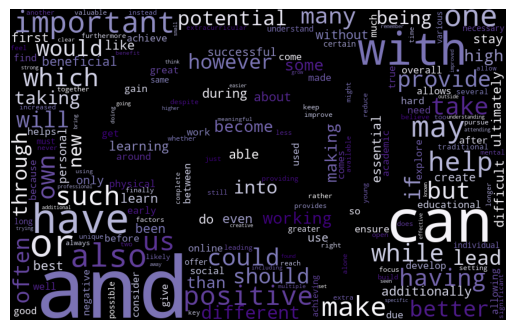

In [65]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np




 #Create an array from the image you want to use as a mask
## Your file path will look different
logo = np.array(Image.open(r"C:\Users\Admin\OneDrive\Documents\word count (Whiteboard) (1).jpg"))

# method 1: convert to dict 
data = dict(zip(df['word'].tolist(), df['count'].tolist()))

wordcloud = WordCloud(background_color="black" ,colormap='Purples' ,mask=logo).generate_from_frequencies(data) # not filtered. must filter word list and then run freq
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


## Bar Chart | option A : manula in adobe | option B : matplotlib aestatic

In [66]:
top_50_words = df['word'].head(50)
top_50_counts = df['count'].head(50)


In [67]:

top_50_words1 = sorted(top_50_words, reverse=True)  
top_50_counts1 = sorted(top_50_counts, reverse=True)
top_50_words1

['would',
 'working',
 'with',
 'will',
 'while',
 'which',
 'us',
 'through',
 'than',
 'taking',
 'take',
 'such',
 'some',
 'should',
 'provide',
 'potential',
 'positive',
 'own',
 'or',
 'one',
 'often',
 'new',
 'may',
 'many',
 'making',
 'make',
 'lead',
 'into',
 'important',
 'if',
 'however',
 'high',
 'help',
 'having',
 'have',
 'even',
 'do',
 'difficult',
 'different',
 'could',
 'can',
 'but',
 'better',
 'being',
 'been',
 'become',
 'and',
 'also',
 'additionally',
 'about']

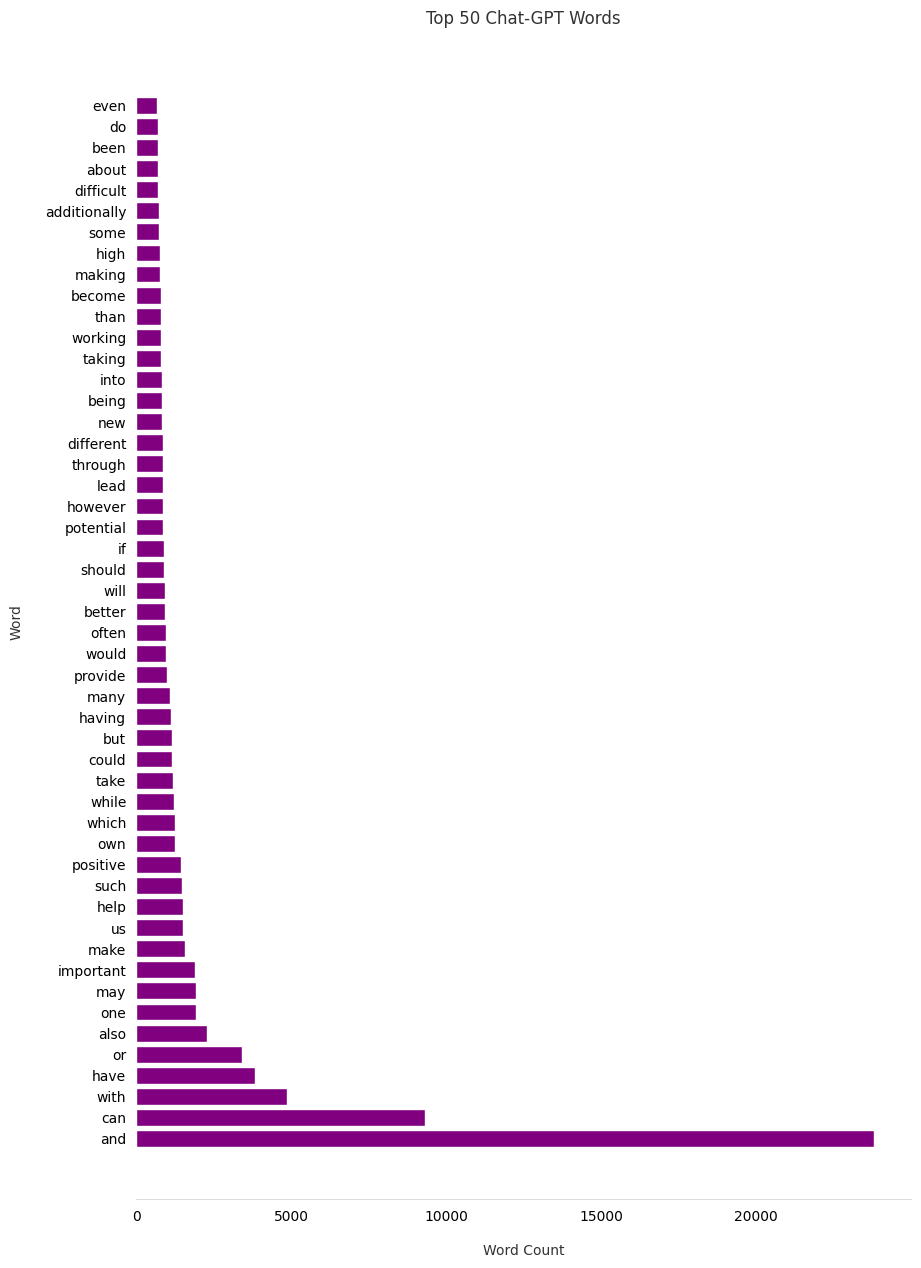

In [68]:
# trying opiton B first
# # Download the fonts we want from Github into our Colab-local font directory.
# !wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# !wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# !wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# !wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

# # Use Matplotlib's font manager to rebuild the font library.
# import matplotlib as mpl
# mpl.font_manager._rebuild()

# Use the newly integrated Roboto font family for all text.
# plt.rc('font', family='Open Sans')

fig, ax = plt.subplots(figsize=(10, 15))


# arrange words in descending order 
# top_50_words = sorted(top_50_words, reverse=True)
# top_50_counts = sorted(top_50_counts, reverse=True)

# ax.set_yticks(range(len(top_50_words)))
# ax.set_yticklabels(top_50_words)

# Save the chart so we can loop through the bars below.

colors = ['purple', 'violet', 'fuchsia']
#bars = ax.barh(color=colors)
bars = ax.barh(
     y=range(len(top_50_words)),
    width=top_50_counts,
    #y=top_50_words,
    #width=top_50_counts,
     edgecolor="w", linewidth=1, color='purple'
    #tick_label=mpg.index.strftime('%Y')


)

ax.set_yticks(range(len(top_50_words))) 
ax.set_yticklabels(top_50_words)

#bars = ax.barh(y=top_50_words, width=top_50_counts,)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
#ax.set_axisbelow(True)
# ax.yaxis.grid(False, color='#EEEEEE')
# ax.xaxis.grid(False)
ax.yaxis.grid(False) 
ax.xaxis.grid(False)




# Add text annotations to the top of the bars.
# bar_color = bars[0].get_facecolor()
# for bar in bars:
#   ax.text(
#       bar.get_x() + bar.get_width() / 2,
#       bar.get_height() + 0.3,
#       round(bar.get_height(), 1),
#       horizontalalignment='center',
#       color=bar_color,
#       weight='bold'
#   )
fig.patch.set_facecolor('white')


# Add labels and a title.
ax.set_xlabel('Word Count', labelpad=15, color='#333333')
ax.set_ylabel('Word', labelpad=15, color='#333333')
ax.set_title('Top 50 Chat-GPT Words', pad=15, color='#333333',
             #weight='bold'
             )

#fig.tight_layout()
plt.show()

In [69]:
lowest_words = lowest_50['word']
lowest_counts = lowest_50['count']


In [75]:
lowest_50

word  count
397  participating     99
398      depending     99
399       deciding     98
400        learned     97
401     impossible     97
402     determined     97
403      extending     97
404        connect     96
405        towards     96
406        express     96
407       actively     96
408      primarily     96
409           push     95
410      confident     95
411       everyday     95
412        prevent     95
413      connected     95
414         simply     95
415            yet     94
416      efficient     94
417          along     94
418          sleep     94
419       provided     93
420    communicate     93
421          takes     93
422           save     93
423         though     93
424       critical     93
425       reaching     93
426    researching     92
427        helpful     92
428         honest     92
429         public     91
430          daily     91
431      generally     91
432       identify     91
433     attributed     91
434           lack     90
435         across     90
436      sometimes     89
437            bad     89
438           meet     89
439        promote     89
440     completing     89
441          fully     89
442         behind     89
443      following     88
444     committing     88
445         energy     88
446           felt     87

In [76]:
# to csv
lowest_50.to_csv("Lowest 50.csv")

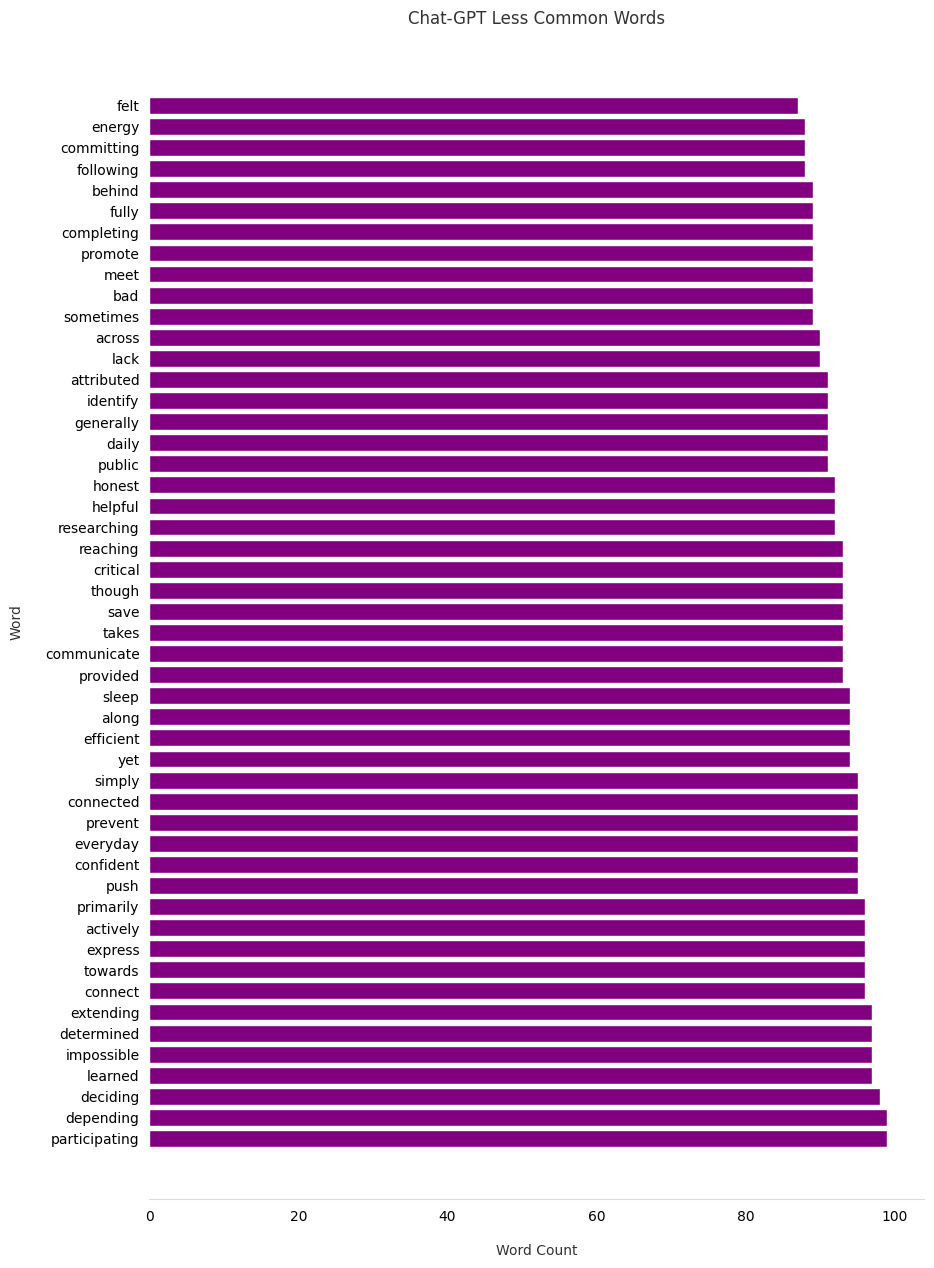

In [70]:
# lowest 50
fig, ax = plt.subplots(figsize=(10, 15))



colors = ['purple', 'violet', 'fuchsia']
#bars = ax.barh(color=colors)
bars = ax.barh(
     y=range(len(lowest_words)),
    width=lowest_counts,
    #y=top_50_words,
    #width=top_50_counts,
     edgecolor="w", linewidth=1, color='purple'
    #tick_label=mpg.index.strftime('%Y')


)

ax.set_yticks(range(len(lowest_words))) 
ax.set_yticklabels(lowest_words)


# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.yaxis.grid(False) 
ax.xaxis.grid(False)





fig.patch.set_facecolor('white')


# Add labels and a title.
ax.set_xlabel('Word Count', labelpad=15, color='#333333')
ax.set_ylabel('Word', labelpad=15, color='#333333')
ax.set_title('Chat-GPT Less Common Words', pad=15, color='#333333',
             #weight='bold'
             )

#fig.tight_layout()
plt.show()

In [71]:
df.tail(50)

word  count
12711          zero sum      1
12712             loser      1
12713      non zero sum      1
12714    norepinephrine      1
12715              lots      1
12716           install      1
12717          condense      1
12718        pollutants      1
12719       counteracts      1
12720        expiration      1
12721             aroma      1
12722           peaches      1
12723              wrap      1
12724  four dimensional      1
12725         extension      1
12726         dimension      1
12727         analogies      1
12728       projections      1
12729         destroyer      1
12730              font      1
12731             icons      1
12732             fonts      1
12733         wingdings      1
12734         geometric      1
12735            smiley      1
12736          supplied      1
12737           pumping      1
12738             chimp      1
12739            chimps      1
12740      higher level      1
12741        prefrontal      1
12742            cortex      1
12743         executive      1
12744            orbits      1
12745           behaves      1
12746        wavelength      1
12747            reflux      1
12748          gasoline      1
12749       circulating      1
12750      electrolysis      1
12751          resupply      1
12752   furanocoumarins      1
12753        cytochrome      1
12754             liver      1
12755             dying      1
12756       trafficking      1
12757         waitstaff      1
12758            hourly      1
12759       expectation      1
12760              tips      1

In [72]:
# make a table of all words
import plotly.graph_objects as go
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df['word'], df['count']],
               fill_color='lavender',
               align='left'))
])

fig.show()

In [73]:
import pandas as pd

# Sample DataFrame
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Population (millions)': [8.4, 3.9, 2.7, 2.3, 1.7],
    'Area (sq miles)': [468.9, 469.3, 227.3, 637.5, 517.6]
}
df = pd.DataFrame(data)

# Display DataFrame as a table
styled_table = df.style.set_table_styles([
    {'selector': 'th',
     'props': [('background-color', 'paleturquoise'),
               ('color', 'navy'),
               ('text-align', 'center')]},
    {'selector': 'td',
     'props': [('background-color', 'lavender'),
               ('text-align', 'center')]}
])

styled_table.set_caption("City Statistics").set_caption("City Statistics").set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'navy'),
              ('font-size', '24px'),
              ('font-family', 'Arial'),
              ('font-weight', 'bold')]
}])
styled_table


In [74]:
import pandas as pd
from tabulate import tabulate

# Sample DataFrame
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
    'Population (millions)': [8.4, 3.9, 2.7, 2.3, 1.7],
    'Area (sq miles)': [468.9, 469.3, 227.3, 637.5, 517.6]
}
df = pd.DataFrame(data)

# Convert DataFrame to a tabulated format
table = tabulate(df, headers='keys', tablefmt='grid')

print(table)


+----+-------------+-------------------------+-------------------+
|    | City        |   Population (millions) |   Area (sq miles) |
+====+=============+=========================+===================+
|  0 | New York    |                     8.4 |             468.9 |
+----+-------------+-------------------------+-------------------+
|  1 | Los Angeles |                     3.9 |             469.3 |
+----+-------------+-------------------------+-------------------+
|  2 | Chicago     |                     2.7 |             227.3 |
+----+-------------+-------------------------+-------------------+
|  3 | Houston     |                     2.3 |             637.5 |
+----+-------------+-------------------------+-------------------+
|  4 | Phoenix     |                     1.7 |             517.6 |
+----+-------------+-------------------------+-------------------+


# Compare with HUMAN !!